In [22]:
import pandas as pd
data = {
        'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
    }
df = pd.DataFrame(data)
print("Sample data:")
print(df.head())



Sample data:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print("Sample data:")
print(df.head())


Sample data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [7]:
from google.colab import files


uploaded = files.upload()


Saving sample_sales_data.csv to sample_sales_data.csv


In [8]:
import pandas as pd
df = pd.read_csv('sample_sales_data.csv')
print(df.head())


    Product  Quantity  Price  Sales Region
0    Laptop         5   1000   5000  North
1     Mouse        15     20    300   West
2  Keyboard        10     50    500   East
3   Monitor         8    200   1600  South
4    Laptop        12    950  11400  North


In [10]:

sales_df = pd.read_csv('sample_sales_data.csv')
print("First few rows of the sales data:")
print(sales_df.head())


First few rows of the sales data:
    Product  Quantity  Price  Sales Region
0    Laptop         5   1000   5000  North
1     Mouse        15     20    300   West
2  Keyboard        10     50    500   East
3   Monitor         8    200   1600  South
4    Laptop        12    950  11400  North


In [11]:
sales_by_region = sales_df.groupby('Region')['Sales'].sum()
print("\nTotal sales by region:")
print(sales_by_region)



Total sales by region:
Region
East       770
North    16400
South     3070
West       650
Name: Sales, dtype: int64


In [15]:
best_selling_products = sales_df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

print("\nBest-selling products by quantity:")
print(best_selling_products)



Best-selling products by quantity:
Product
Mouse       29
Laptop      17
Keyboard    16
Monitor     15
Name: Quantity, dtype: int64


In [16]:

sales_by_region.to_csv('sales_by_region.csv', index=False)
best_selling_products.to_csv('best_selling_products.csv', index=True)
print("\nAnalysis results saved to CSV files.")



Analysis results saved to CSV files.


In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tickers = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]
data = yf.download(tickers, start="2022-10-01", end="2023-10-01", group_by='ticker')
print("First 5 rows of the dataset:")
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


First 5 rows of the dataset:
Ticker      RELIANCE.NS                                                   \
Price              Open         High          Low        Close    Volume   
Date                                                                       
2022-10-03  1092.200087  1103.823070  1079.184148  1082.152710  11852723   
2022-10-04  1095.077322  1104.302648  1091.583517  1102.110474   8948850   
2022-10-06  1109.326383  1118.917011  1104.371128  1106.175049  13352162   
2022-10-07  1102.772687  1116.131217  1102.772687  1110.856323   7714340   
2022-10-10  1098.365534  1104.120008  1090.601658  1098.730957   6329527   

Ticker           TCS.NS                                                  \
Price              Open         High          Low        Close   Volume   
Date                                                                      
2022-10-03  2799.044354  2823.062819  2779.418333  2789.651855  1763331   
2022-10-04  2831.707536  2895.305232  2825.212304  2888.903320

In [18]:
print("\nShape of the dataset:")
print(data.shape)
print("\nColumn names:")
print(data.columns)
reliance_data = data['RELIANCE.NS']
print("\nSummary statistics for Reliance Industries:")
print(reliance_data.describe())
reliance_data['Daily Return'] = reliance_data['Close'].pct_change()




Shape of the dataset:
(247, 15)

Column names:
MultiIndex([('RELIANCE.NS',   'Open'),
            ('RELIANCE.NS',   'High'),
            ('RELIANCE.NS',    'Low'),
            ('RELIANCE.NS',  'Close'),
            ('RELIANCE.NS', 'Volume'),
            (     'TCS.NS',   'Open'),
            (     'TCS.NS',   'High'),
            (     'TCS.NS',    'Low'),
            (     'TCS.NS',  'Close'),
            (     'TCS.NS', 'Volume'),
            (    'INFY.NS',   'Open'),
            (    'INFY.NS',   'High'),
            (    'INFY.NS',    'Low'),
            (    'INFY.NS',  'Close'),
            (    'INFY.NS', 'Volume')],
           names=['Ticker', 'Price'])

Summary statistics for Reliance Industries:
Price         Open         High          Low        Close        Volume
count   247.000000   247.000000   247.000000   247.000000  2.470000e+02
mean   1151.456598  1160.153645  1141.068152  1150.426977  1.316652e+07
std      66.114617    67.077795    65.976394    66.914366  6.754099

<ipython-input-18-9d1e90f12452>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance_data['Daily Return'] = reliance_data['Close'].pct_change()


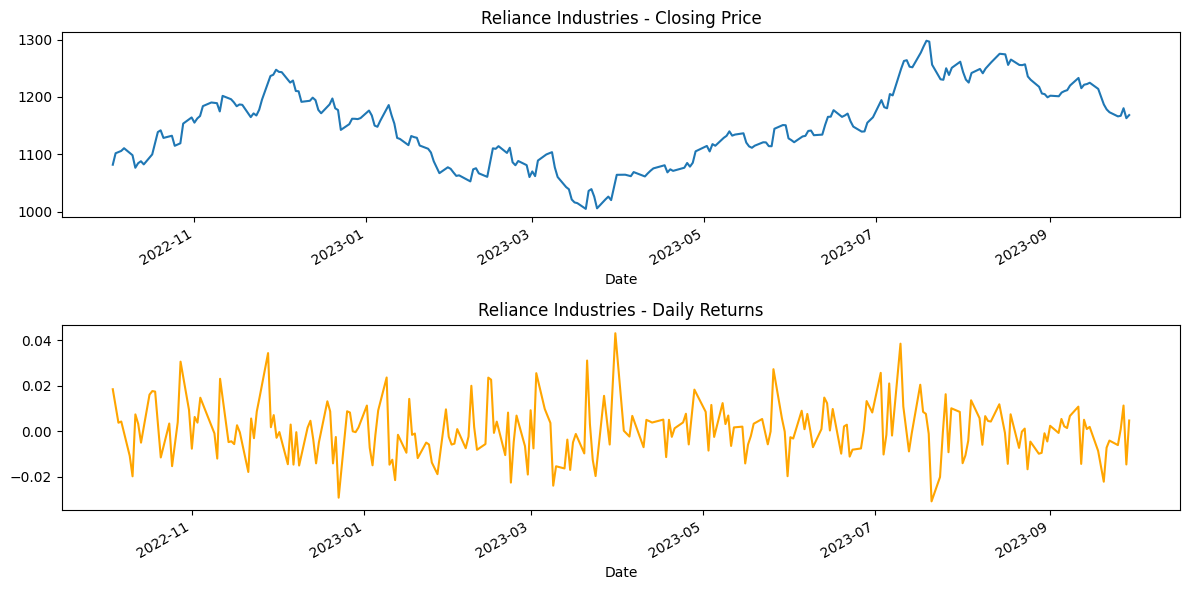

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
reliance_data['Close'].plot(title="Reliance Industries - Closing Price")
plt.subplot(2, 1, 2)
reliance_data['Daily Return'].plot(title="Reliance Industries - Daily Returns", color='orange')
plt.tight_layout()
plt.show()


In [20]:
reliance_data.to_csv('reliance_stock_data.csv')
print("\nReliance stock data saved to 'reliance_stock_data.csv'.")




Reliance stock data saved to 'reliance_stock_data.csv'.


[*********************100%***********************]  3 of 3 completed
<ipython-input-29-e6cdaf404767>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['Daily Return'] = bank_data['Close'].pct_change()
<ipython-input-29-e6cdaf404767>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['Daily Return'] = bank_data['Close'].pct_change()
<ipython-input-29-e6cdaf404767>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_


Columns structure:
MultiIndex([( 'Close',  'HDFCBANK.NS'),
            ( 'Close', 'ICICIBANK.NS'),
            ( 'Close', 'KOTAKBANK.NS'),
            (  'High',  'HDFCBANK.NS'),
            (  'High', 'ICICIBANK.NS'),
            (  'High', 'KOTAKBANK.NS'),
            (   'Low',  'HDFCBANK.NS'),
            (   'Low', 'ICICIBANK.NS'),
            (   'Low', 'KOTAKBANK.NS'),
            (  'Open',  'HDFCBANK.NS'),
            (  'Open', 'ICICIBANK.NS'),
            (  'Open', 'KOTAKBANK.NS'),
            ('Volume',  'HDFCBANK.NS'),
            ('Volume', 'ICICIBANK.NS'),
            ('Volume', 'KOTAKBANK.NS')],
           names=['Price', 'Ticker'])


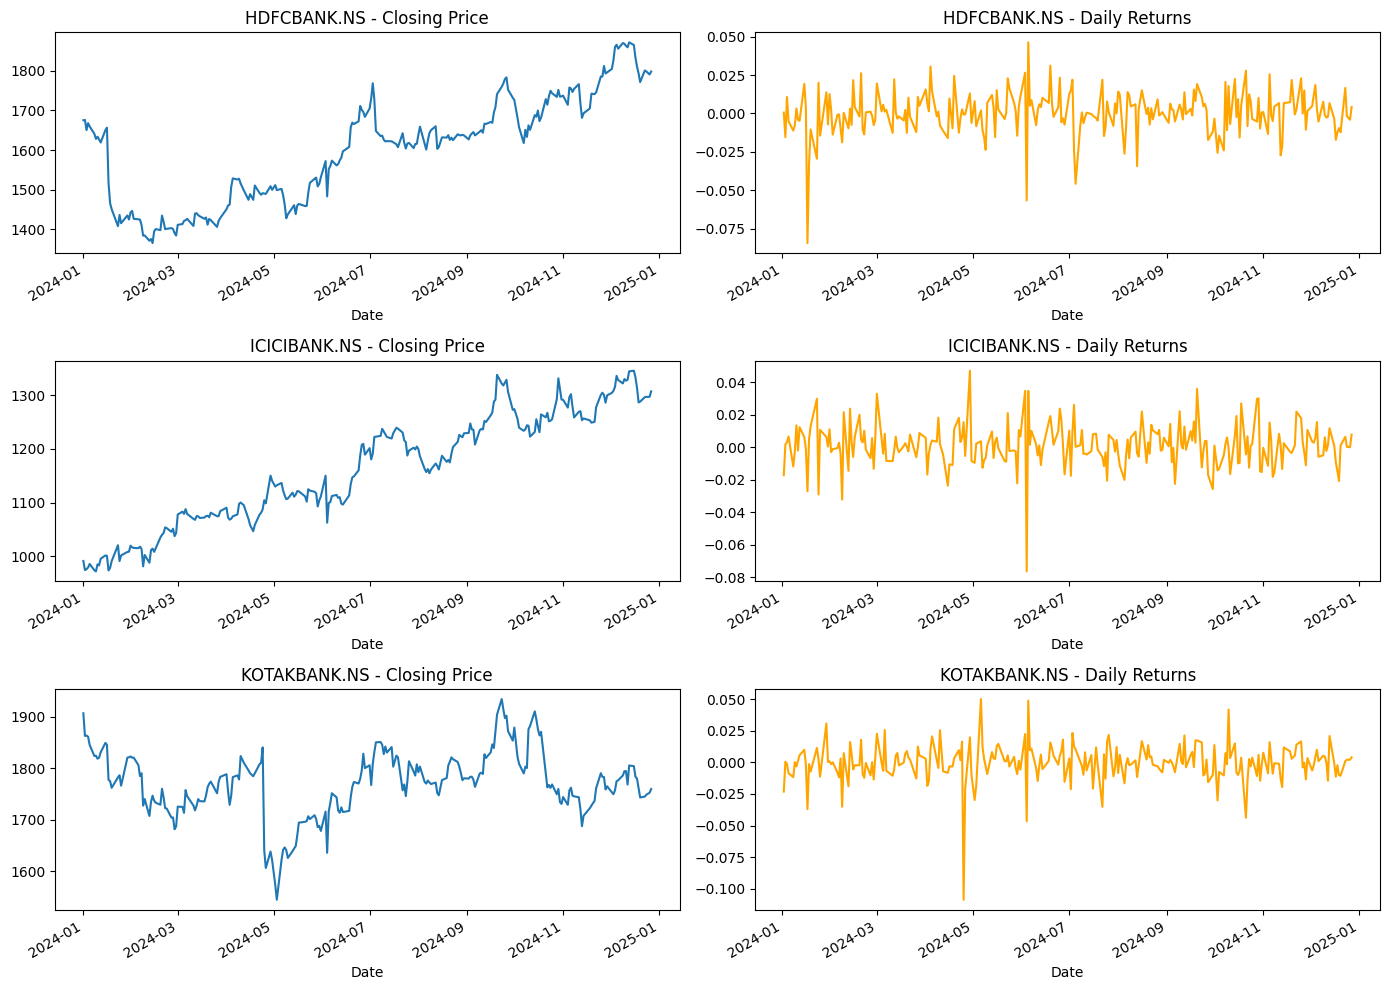


HDFCBANK.NS stock data saved to 'HDFCBANK.NS_stock_data.csv'.

ICICIBANK.NS stock data saved to 'ICICIBANK.NS_stock_data.csv'.

KOTAKBANK.NS stock data saved to 'KOTAKBANK.NS_stock_data.csv'.


In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS"]

data = yf.download(tickers, start="2024-01-01", end="2024-12-30")

print("\nColumns structure:")
print(data.columns)

plt.figure(figsize=(14, 10))

for i, ticker in enumerate(tickers):
    bank_data = data.xs(ticker, axis=1, level=1)
    bank_data['Daily Return'] = bank_data['Close'].pct_change()
    plt.subplot(3, 2, 2 * i + 1)
    bank_data['Close'].plot(title=f"{ticker} - Closing Price")
    plt.subplot(3, 2, 2 * i + 2)
    bank_data['Daily Return'].plot(title=f"{ticker} - Daily Returns", color='orange')
plt.tight_layout()
plt.show()
for ticker in tickers:
    bank_data = data.xs(ticker, axis=1, level=1)
    bank_data.to_csv(f"{ticker}_stock_data.csv")
    print(f"\n{ticker} stock data saved to '{ticker}_stock_data.csv'.")
